<h1>Dự đoán người sử dụng thuốc lá bằng Bayesian Network</h1>

<h2>Install dependencies</h2>

In [1]:
%pip install bnlearn
%pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 26.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 116.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

<h2>Importing libraries</h2>

In [2]:
import numpy as np
import pandas as pd
import bnlearn as bn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<h2>Reading the data</h2>

In [3]:
train = pd.read_csv('/kaggle/input/smoker-status-prediction/train_dataset.csv')
test = pd.read_csv('/kaggle/input/smoker-status-prediction/test_dataset.csv')

<h2>Analysing the data</h2>

In [4]:
train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [5]:
test.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,...,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000
mean,44.312006,164.555602,65.692782,82.009792,1.007182,1.004351,1.026095,1.026035,121.537587,76.029148,...,126.470254,57.283816,114.691525,14.618692,1.088820,0.885055,26.147235,26.781362,40.062246,0.210797
std,12.089099,9.210712,12.639255,9.150549,0.458500,0.467140,0.159423,0.159245,13.751759,9.727289,...,71.259041,15.018255,35.948974,1.559794,0.411293,0.223621,19.769301,30.085442,51.657330,0.407887
min,20.000000,135.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,79.000000,40.000000,...,16.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,107.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,30.000000,43.000000,0.000000
max,85.000000,190.000000,125.000000,125.800000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,...,405.000000,618.000000,1660.000000,20.900000,6.000000,10.300000,1311.000000,2062.000000,999.000000,1.000000


<h4>Preparing the data</h4>

In [6]:
# # Dropping irrelevant columns
# drop_list = ['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
# train = train.drop(columns=drop_list)
# test = test.drop(columns=drop_list)

In [7]:
# Converting categorical data

# Tách cột mục tiêu ra khỏi tập train trước
y_train = train.pop('smoking')

# Gộp phần còn lại của train và test, sau đó chạy one-hot encoding
# Cách này đảm bảo các cột được tạo ra là nhất quán
train_len = len(train)
_, dfnum_combined = bn.df2onehot(pd.concat([train, test], axis=0, ignore_index=True))

# Tách lại thành 2 tập train và test
dfnum_train = dfnum_combined.iloc[:train_len].copy()
dfnum_test = dfnum_combined.iloc[train_len:].copy()

# Ghép lại cột mục tiêu vào đúng tập train đã xử lý
dfnum_train['smoking'] = y_train.values

# Các biến dfhot không dùng đến
dfhot_train, dfhot_test = None, None

print("Xử lý thành công!")
print("Kích thước dfnum_train mới:", dfnum_train.shape)
print("Kích thước dfnum_test mới:", dfnum_test.shape)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 22/22 [00:01<00:00, 13.24it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 22/22 [00:02<00:00, 10.37it/s]


[df2onehot] >Total onehot features: 1614
Xử lý thành công!
Kích thước dfnum_train mới: (38984, 18)
Kích thước dfnum_test mới: (16708, 17)


In [8]:
dfnum_target = dfnum_train.pop('smoking')

<h2>Making the Bayesian Network</h2>

In [9]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=40)
valid = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')

[bnlearn] >Computing best DAG using [nb]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


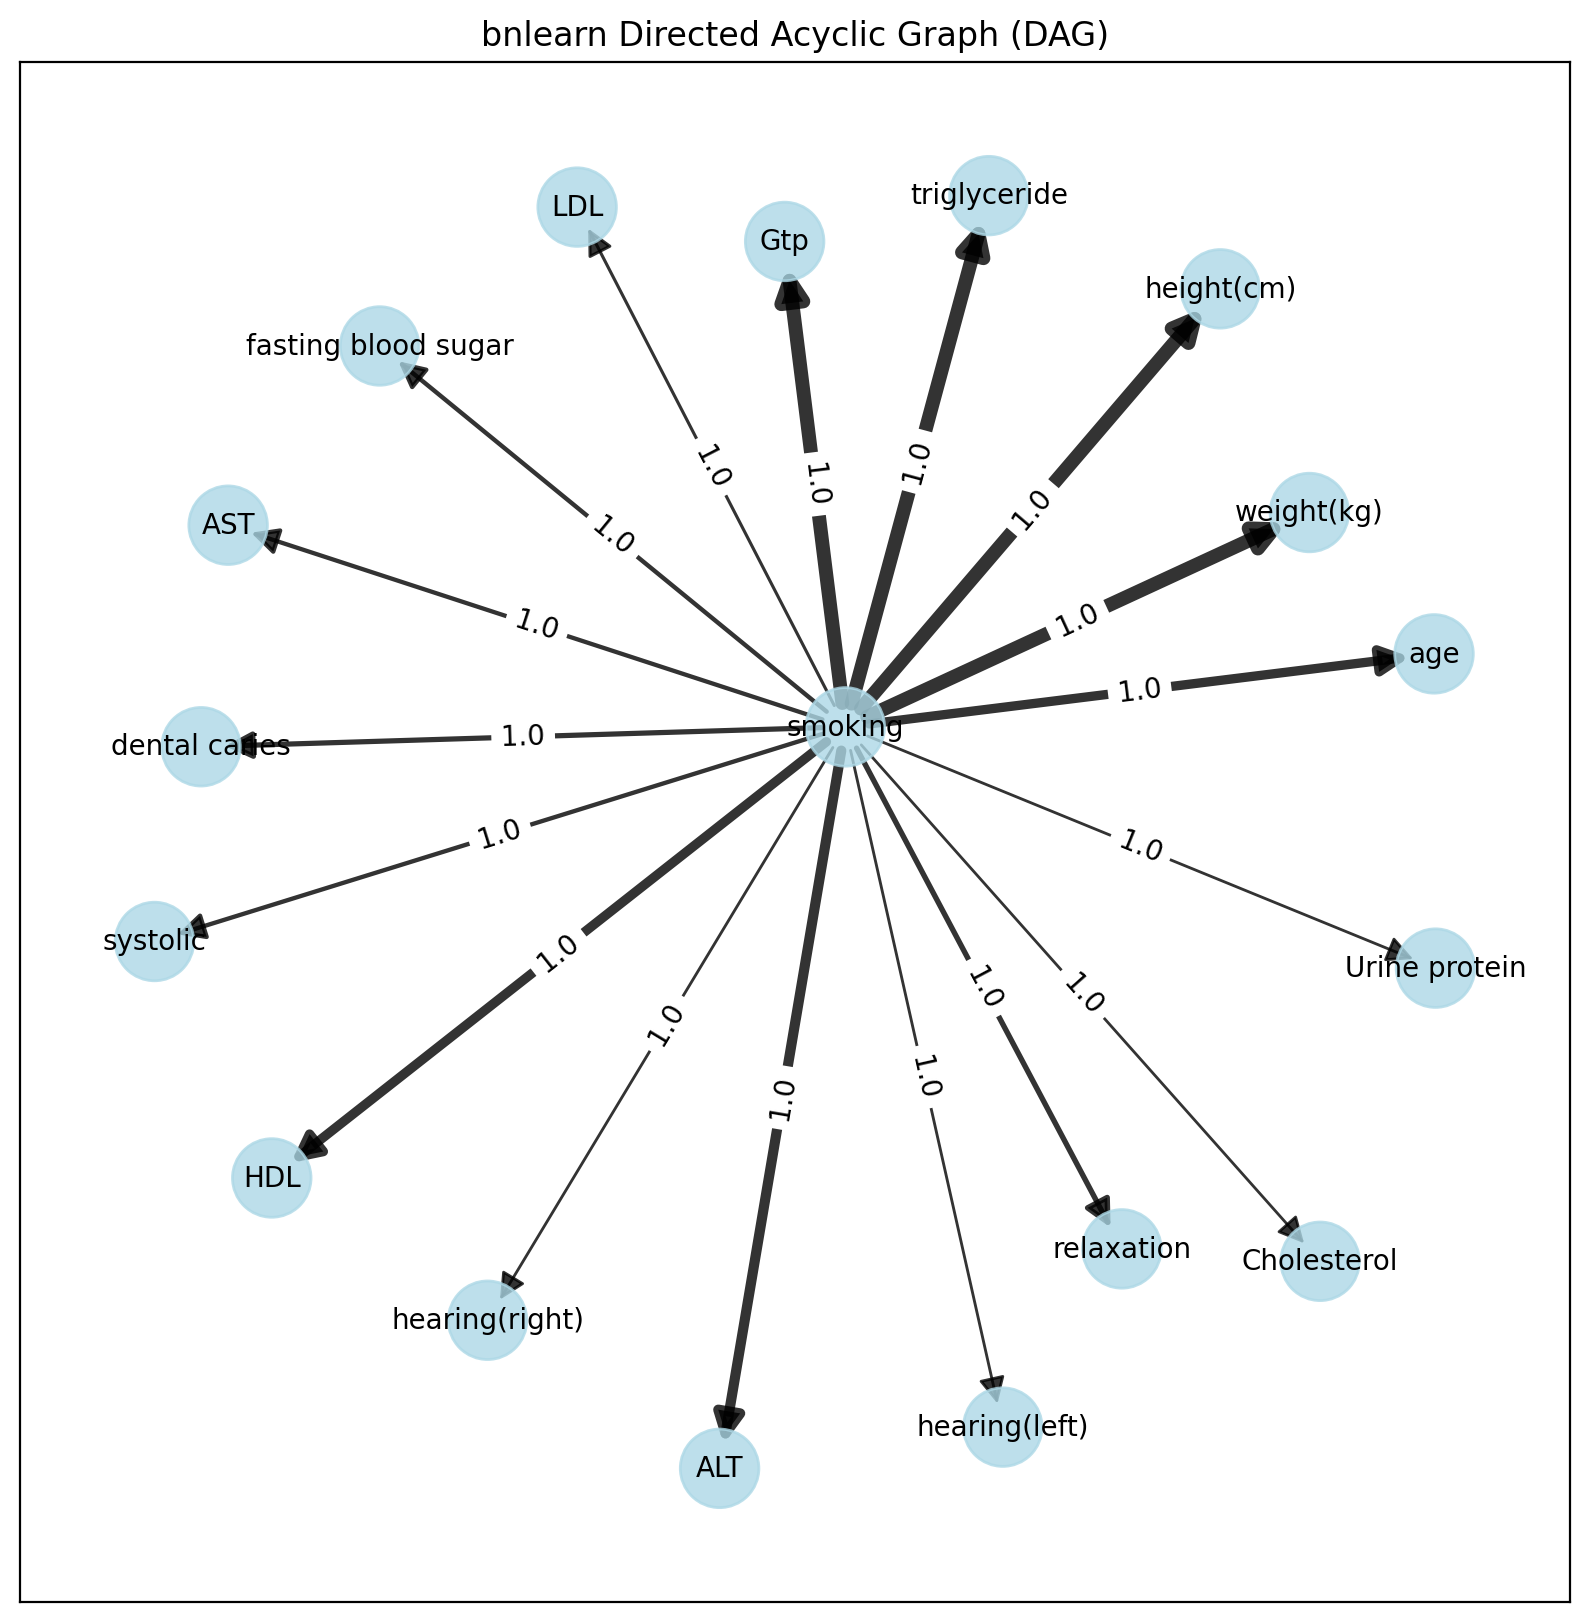

In [10]:
# Structure learning
DAG = bn.structure_learning.fit(dfnum, methodtype='nb', root_node='smoking', verbose=3)

# Compute edge strength using chi-square independence test
model = bn.independence_test(DAG, dfnum, prune=False)

# Plot
G = bn.plot(model)

In [11]:
# Parameter learning
model = bn.parameter_learning.fit(model, dfnum, verbose=3);

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.models.NaiveBayes.NaiveBayes'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of smoking:
+------------+----------+
| smoking(0) | 0.627955 |
+------------+----------+
| smoking(1) | 0.372045 |
+------------+----------+
[bnlearn] >CPD of age:
+---------+-----------------------+-----------------------+
| smoking | smoking(0)            | smoking(1)            |
+---------+-----------------------+-----------------------+
| age(1)  | 0.023239376890673145  | 0.041395764986579174  |
+---------+-----------------------+-----------------------+
| age(2)  | 0.05401317463458765   | 0.07939158962123469   |
+---------+-----------------------+-----------------------+
| age(3)  | 0.06123660625936501   | 0.09350432448553532   |
+---------+-----------------------+-----------------------+
| age(4)  | 0.0589607305419694    | 0.11713689233522216   |
+---------

<h4>Get prediction and accuracy</h4>

In [12]:

def get_acc(model, df, col):
    model_nodes = list(model['model'].nodes())
    df_aligned = df[model_nodes].copy()
    pred = bn.predict(model, df_aligned, variables=[col])
    print(pred)
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

In [13]:
# Get score of the model1
acc1 = get_acc(model, valid, 'smoking')

[bnlearn]> Remaining columns for inference: 17


100%|██████████| 7584/7584 [00:15<00:00, 480.49it/s]


      smoking         p
0           1  0.945182
1           0  0.718377
2           1  0.854330
3           1  0.993408
4           1  0.956403
...       ...       ...
7792        1  0.986665
7793        0  0.997441
7794        0  0.729784
7795        0  0.990480
7796        0  0.999347

[7797 rows x 2 columns]
Accuracy - 0.7065538027446454


In [14]:
print("Bắt đầu dự đoán trên tập test...")
predictions_test = bn.predict(model, dfnum_test, variables=['smoking'])
print("Dự đoán hoàn tất.")
print("\nKết quả dự đoán trên tập test (5 dòng đầu):")
print(predictions_test.head())
print("\nPhân phối các lớp được dự đoán:")
print(predictions_test['smoking'].value_counts())

Bắt đầu dự đoán trên tập test...
[bnlearn]> Remaining columns for inference: 17


100%|██████████| 15710/15710 [00:33<00:00, 465.77it/s]


Dự đoán hoàn tất.

Kết quả dự đoán trên tập test (5 dòng đầu):
   smoking         p
0        1  0.942570
1        1  0.750336
2        1  0.715329
3        0  0.918187
4        1  0.607654

Phân phối các lớp được dự đoán:
smoking
0    9860
1    6848
Name: count, dtype: int64


Bắt đầu học cấu trúc bằng Hill Climb Search...
[bnlearn] >Computing best DAG using [hillclimbsearch]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
Vẽ đồ thị cấu trúc đã học...
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


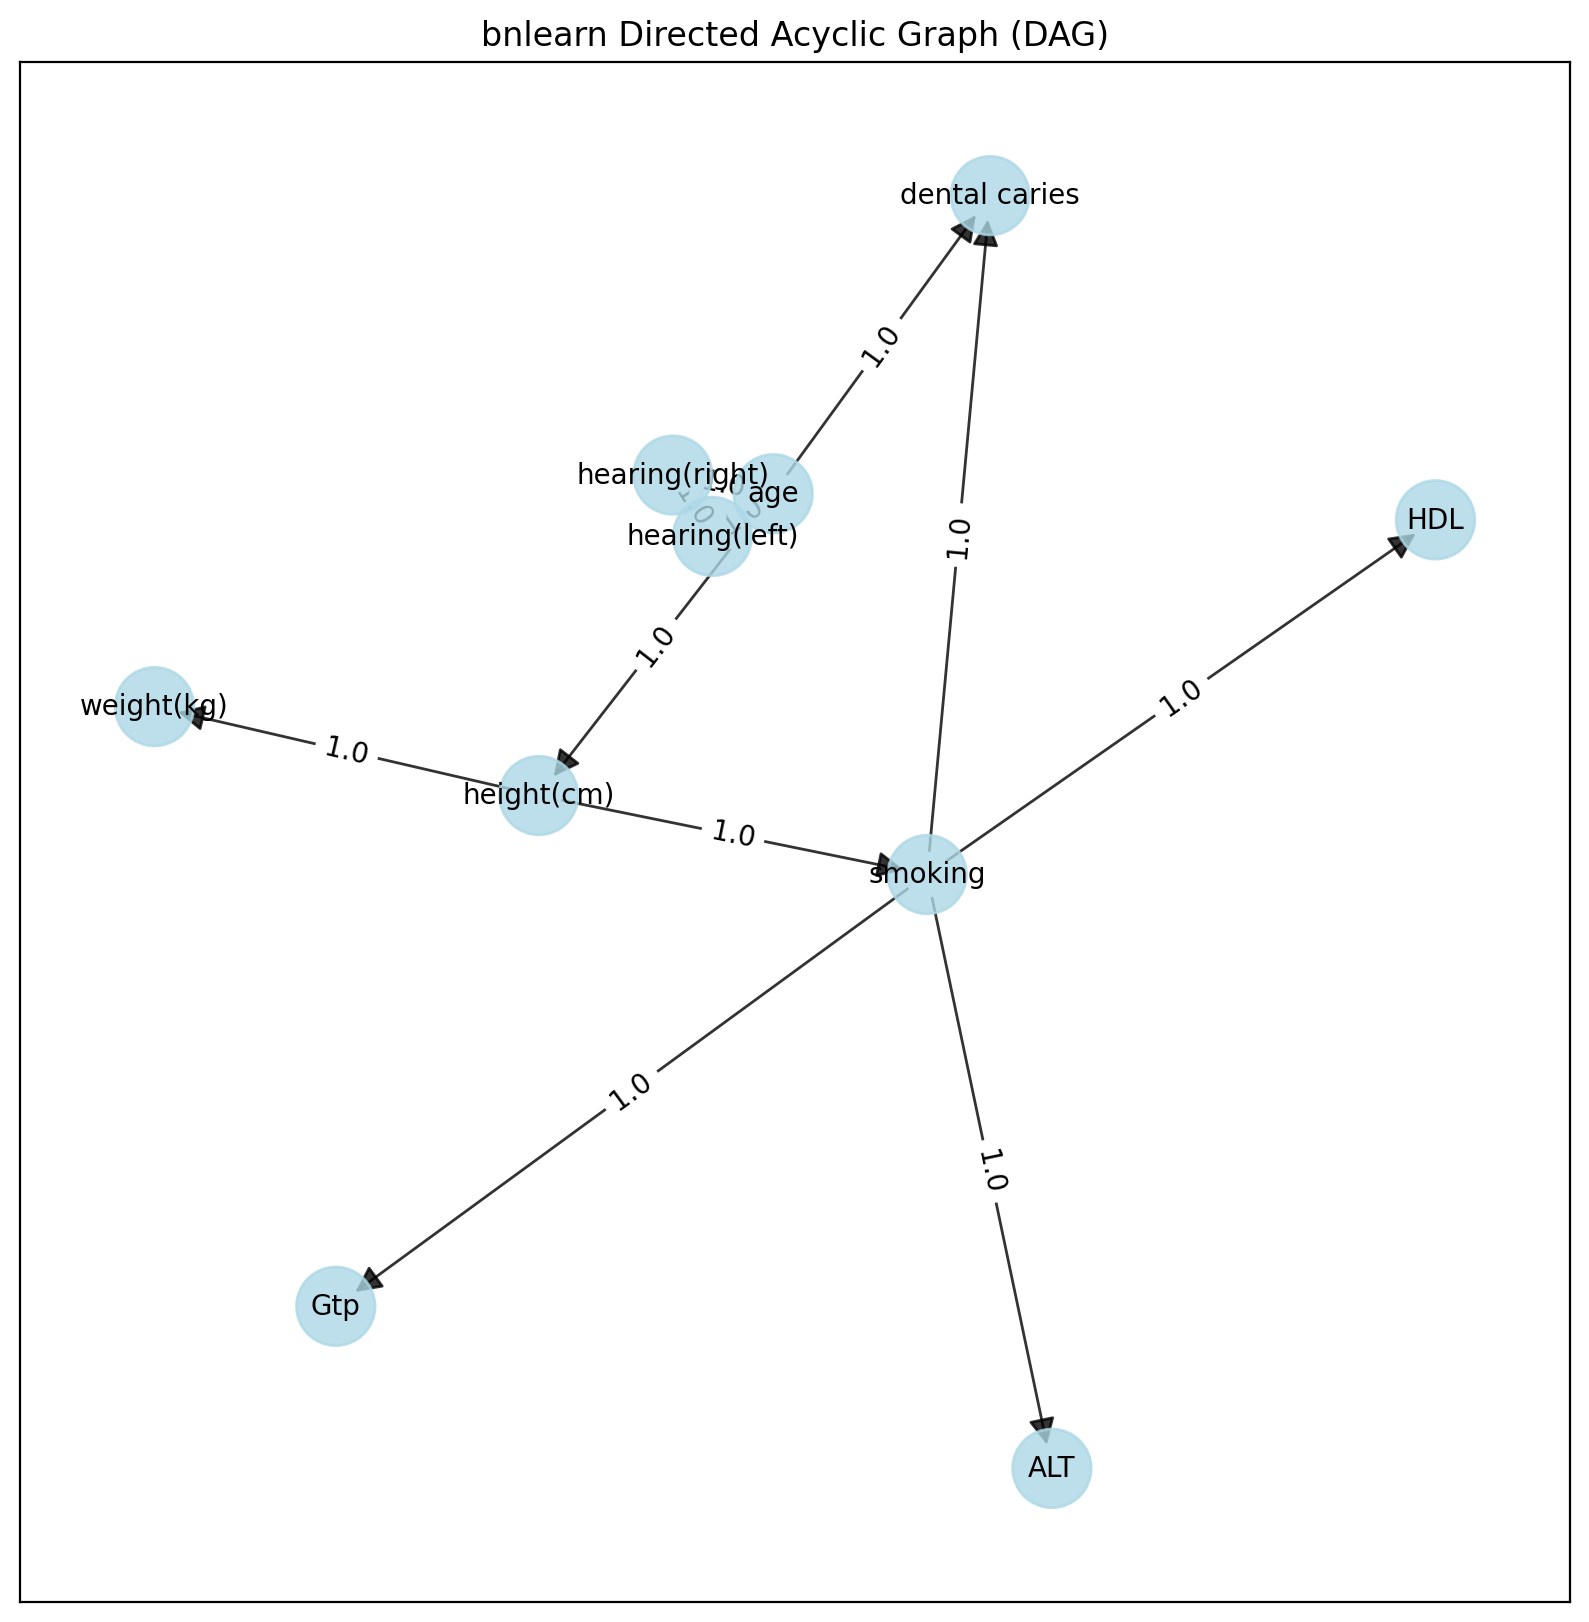

In [15]:
print("Bắt đầu học cấu trúc bằng Hill Climb Search...")
# scoretype='bic' (Bayesian Information Criterion) là một phương pháp tính điểm phổ biến để đánh giá cấu trúc mạng
DAG_hc = bn.structure_learning.fit(dfnum, methodtype='hillclimbsearch', scoretype='bic')

# Plot the learned structure
# Đồ thị này sẽ phức tạp hơn cấu trúc Naive Bayes
print("Vẽ đồ thị cấu trúc đã học...")
G_hc = bn.plot(DAG_hc)

In [16]:
print("Bắt đầu học tham số cho cấu trúc mới...")
model_hc = bn.parameter_learning.fit(DAG_hc, dfnum)
print("Học tham số hoàn tất.")

Bắt đầu học tham số cho cấu trúc mới...
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of age:
+----------------+-----+----------------------+
| hearing(left)  | ... | hearing(left)(1)     |
+----------------+-----+----------------------+
| hearing(right) | ... | hearing(right)(1)    |
+----------------+-----+----------------------+
| age(1)         | ... | 0.028745644599303125 |
+----------------+-----+----------------------+
| age(2)         | ... | 0.028745644599303125 |
+----------------+-----+----------------------+
| age(3)         | ... | 0.03789198606271776  |
+----------------+-----+----------------------+
| age(4)         | ... | 0.031794425087108    |
+----------------+-----+----------------------+
| age(5)         | ... | 0.06533101045296165  |
+----------------+-----+----------------------+
| age(6)         | ... 

In [17]:
print("Bắt đầu dự đoán và tính độ chính xác cho mô hình thứ 2...")
acc2 = get_acc(model_hc, valid, 'smoking')

Bắt đầu dự đoán và tính độ chính xác cho mô hình thứ 2...
[bnlearn]> Remaining columns for inference: 9


100%|██████████| 7583/7583 [00:09<00:00, 799.12it/s]


      smoking         p
0           1  0.766720
1           0  0.702911
2           1  0.580721
3           1  0.842448
4           1  0.831696
...       ...       ...
7792        1  0.907556
7793        0  0.983780
7794        0  0.761010
7795        0  0.938747
7796        0  0.994709

[7797 rows x 2 columns]
Accuracy - 0.7161728870078236
